### 图像分类数据集
MNIST数据集是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。我们将使用类似但更复杂的Fashion-MNIST数据集

In [1]:
%matplotlib inline
import torch
import torchvision  # PyTorch中的图像处理工具库torchvision，它提供了一些常用的数据集、图像变换等功能。
from torch.utils import data    # 用于数据加载和处理
from torchvision import transforms  # 用于图像的预处理操作
from d2l import torch as d2l

d2l.use_svg_display()   # 用于设置在Notebook中显示SVG格式的图像

In [20]:
# 通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中。
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式。
# 并除以255使得所有像素的数值均在0到1之间

# `transforms`模块中包含了许多图像预处理操作，而`ToTensor()`是其中一个常用的预处理操作
# 用于将PIL（Python Imaging Library）图像或NumPy数组转换为PyTorch的Tensor（张量）格式
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,  # 表示是否为训练集数据
    transform=
    trans,  # 使用上面创建的`transforms.ToTensor()`对象`trans`对数据集中的图像进行预处理。这里将图像转换为Tensor格式。
    download=True)  # 如果数据集不存在，则下载FashionMNIST数据集到指定的`root`路径。
mnist_test = torchvision.datasets.FashionMNIST(root="data",
                                               train=False,
                                               transform=trans,
                                               download=True)
len(mnist_train), len(mnist_test)

(60000, 10000)

In [5]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

`mnist_train[0]`表示训练数据集`mnist_train`中的**第一个样本**。FashionMNIST数据集中的每个样本都包含两部分：一个是图像数据，另一个是对应的标签（表示图像所属的类别）。因此，`mnist_train[0]`是一个**元组，包含了图像数据和对应的标签**。

- `mnist_train[0][0]`表示**第一个样本的图像数据，即获取了该样本中的图像部分**。
- `.shape`是一个属性，用于获取Tensor的形状（shape）。**对于图像数据，它代表图像的维度信息，通常是一个三维张量，表示`(通道数, 高度, 宽度)`。**

所以，`mnist_train[0][0].shape`返回的是第一个样本的图像数据的形状信息，用来描述图像的维度。例如，如果返回的是`(1, 28, 28)`，表示图像是单通道（灰度图）且大小为28x28像素。如果返回的是`(3, 32, 32)`，表示图像是三通道（RGB彩色图）且大小为32x32像素。

> 注意：FashionMNIST数据集中的图像都是**单通道的**，所以`mnist_train[0][0].shape`的结果应该是`(1, 28, 28)`。

In [30]:
# 两个可视化数据集的函数


def get_fashion_mnist_labels(labels):
    """
    返回Fashion-MNIST数据集的文本标签。

    将Fashion-MNIST数据集中的标签从0到9的整数映射为对应的文本标签。
    每个整数代表一个不同的类别。例如，0对应't-shirt'，1对应'trouser'，依次类推。

    Args:
        labels (list): 包含Fashion-MNIST数据集标签的整数列表。

    Returns:
        list: 返回一个包含对应文本标签的列表。
    """
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in labels]


def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """
    绘制图像列表imgs。

    将`num_rows`行和`num_cols`列的图像排列在一个图像网格中进行显示。
    可以通过`titles`参数提供图像的标题列表，并通过`scale`参数控制图像的缩放比例。

    Args:
        imgs (list): 图像列表，可以包含PIL图像或PyTorch张量(Tensor)格式的图像数据。
        num_rows (int): 图像网格的行数。
        num_cols (int): 图像网格的列数。
        titles (list, optional): 图像的标题列表，长度应与`imgs`中的图像数量相同。如果不提供此参数，则不会显示标题。
        scale (float, optional): 图像的缩放比例。默认值为1.5。

    Returns:
        list: 返回一个包含绘制的图像的Axes对象列表。
    """
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)  # 隐藏网格中的x坐标轴
        ax.axes.get_yaxis().set_visible(False)  # 隐藏网格中的y坐标轴
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

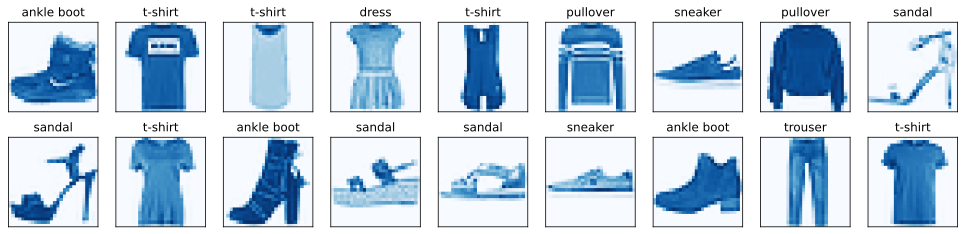

In [36]:
# 几个样本的图像及其相应的标签

X, y = next(iter(data.DataLoader(mnist_train,
                                 batch_size=18)))  # 每次从数据集中加载18个样本（图像）作为一个批次。
show_images(
    X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y)
)  # 将Tensor `X`的形状从`(18, 1, 28, 28)`调整为`(18, 28, 28)`，以便与`show_images`函数的要求相匹配。

In [45]:
# 读取一小批量数据，大小为batch_size

batch_size = 256


def get_dataloader_workers():
    """使用4个CPU进程来读取数据"""
    return 4


train_iter = data.DataLoader(mnist_train,
                             batch_size,
                             shuffle=True,
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()  # 创建一个计时器对象，用于记录时间。
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'  # 使用`timer.stop()`函数获取从计时器开始到当前时间的时间差，并使用`f-string`格式化输出字符串，保留2位小数，表示从读取数据开始到读取结束的时间。


'1.25 sec'

In [49]:
# 定义`load_data_fashion_mnist`函数
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:  # 如果指定了`resize`参数，则在`trans`列表的开头插入一个`transforms.Resize(resize)`操作，用于调整图像的大小为指定的尺寸。
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="data",
                                                    train=True,
                                                    transform=trans,
                                                    download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="data",
                                                   train=False,
                                                   transform=trans,
                                                   download=True)

    # 函数返回一个包含训练数据加载器和测试数据加载器的元组。
    return (data.DataLoader(mnist_train,
                            batch_size,
                            shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test,
                            batch_size,
                            shuffle=False,
                            num_workers=get_dataloader_workers()))